In [6]:
#import lib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#define variables
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-12-31'
interval = '1d'

starting_balance = 10000
ma = 50

#download data
data = yf.download(symbol, start=start_date, end=end_date, multi_level_index=False)

data


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


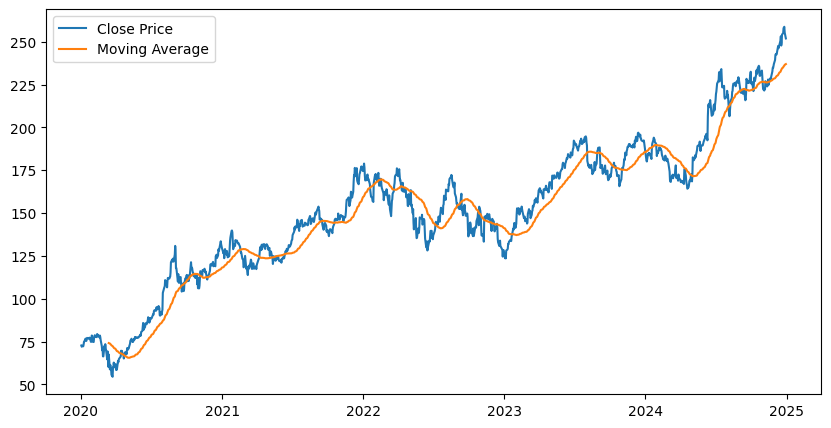

In [8]:
data['MA'] = data['Close'].rolling(window=ma).mean()

#plot data and visualize
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA'], label='Moving Average')
plt.legend()
plt.show()

In [9]:
#calculate Daily Return
data['Return'] = data.Close / data.Close.shift(1)
data.Return.iat[0] = 1
data['Bench_Bal'] = starting_balance * data.Return.cumprod()

first_timestap = data.index.min()
last_timestap = data.index.max()

# Calculate the number of years
years = (last_timestap - first_timestap).days / 365.25

data['Bench_Peak'] = data.Bench_Bal.cummax()
data['Bench_DD'] = data.Bench_Bal - data.Bench_Peak

data

,Close,High,Low,Open,Volume,MA,Return,Bench_Bal,Bench_Peak,Bench_DD
Date,,,,,,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400,NaN,1.000000,10000.000000,10000.000000,0.000000
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,NaN,0.990278,9902.780799,10000.000000,-97.219201
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200,NaN,1.007968,9981.689300,10000.000000,-18.310700
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000,NaN,0.995297,9934.744785,10000.000000,-65.255215
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,NaN,1.016086,10094.559470,10094.559470,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,235.021528,1.003065,35066.485406,35066.485406,0.000000
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,235.564016,1.011478,35468.980874,35468.980874,0.000000
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,236.071997,1.003176,35581.619171,35581.619171,0.000000


Benchmark Annual Return: 28.25%
Benchmark Max Drawdown: -31.43%


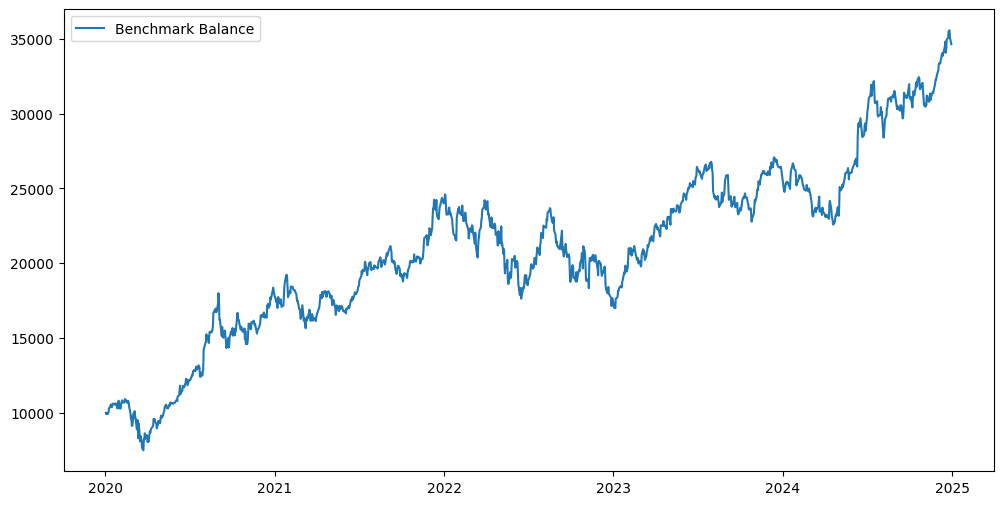

In [10]:
#metrics print out
cagr_bench = round((((data.Bench_Bal.iloc[-1] / data.Bench_Bal.iloc[0]) ** (1 / years)) - 1) * 100, 2)
cagr_bench

dd_bench = round(((data.Bench_DD / data.Bench_Peak).min()) * 100, 2)

print(f"Benchmark Annual Return: {cagr_bench}%")
print(f"Benchmark Max Drawdown: {dd_bench}%")

#plot benchmark
plt.figure(figsize=(12, 6))
plt.plot(data.Bench_Bal, label='Benchmark Balance')
plt.legend()
plt.show()